In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
vel_primal_exact = np.load('../results/vel_primal_exact.npy')
vel_dual_exact = np.load('../results/vel_dual_exact.npy')
vel_primal_approx = np.load('../results/vel_primal_approx.npy')
vel_dual_approx = np.load('../results/vel_dual_approx.npy')

vel_primal_exact_eta = np.load('../results/vel_primal_exact_eta.npy')
vel_dual_exact_eta = np.load('../results/vel_dual_exact_eta.npy')
vel_primal_approx_eta = np.load('../results/vel_primal_approx_eta.npy')
vel_dual_approx_eta = np.load('../results/vel_dual_approx_eta.npy')

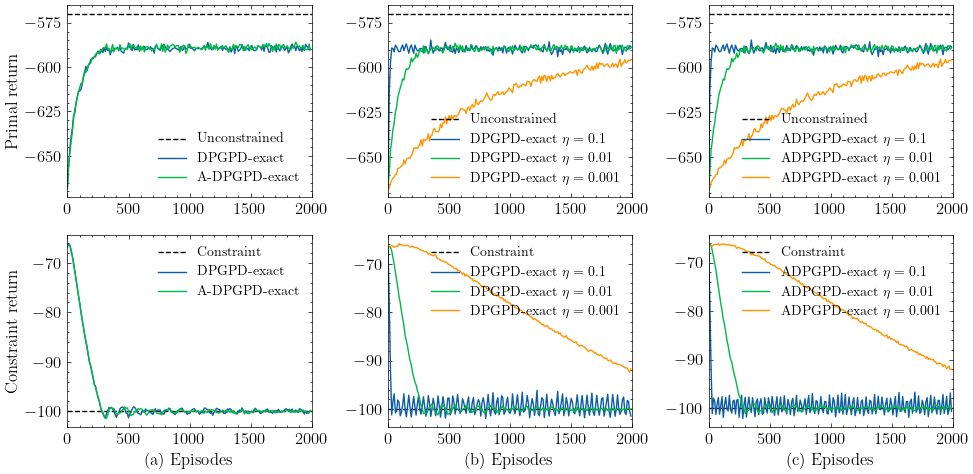

In [14]:
with plt.style.context(['science'], ['ieee']):
    matplotlib.rcParams.update({'font.size': 12})
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[10, 5])

    axes[0, 0].axhline(y=-570, color='k', linestyle='--', label='Unconstrained')
    axes[0, 0].plot(np.arange(0, 2000, 10), vel_primal_exact, label='DPGPD-exact')
    axes[0, 0].plot(np.arange(0, 2000, 10), vel_primal_approx, label='A-DPGPD-exact')
    axes[0, 0].set_xlim(0, 2000)
    axes[0, 0].legend(loc='lower right', fontsize=10)

    axes[0, 0].set_ylabel('Primal return')

    axes[1, 0].axhline(y=-100, color='k', linestyle='--', label='Constraint')
    axes[1, 0].plot(np.arange(0, 2000, 10), vel_dual_exact, label='DPGPD-exact')
    axes[1, 0].plot(np.arange(0, 2000, 10), vel_dual_approx, label='A-DPGPD-exact')
    axes[1, 0].set_xlim(0, 2000)
    axes[1, 0].legend(fontsize=10)

    axes[1, 0].set_xlabel('(a) Episodes')
    axes[1, 0].set_ylabel('Constraint return')

    #################

    axes[0, 1].axhline(y=-570, color='k', linestyle='--', label='Unconstrained')
    axes[0, 1].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[0, :], label='DPGPD-exact $\eta=0.1$')
    axes[0, 1].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[1, :], label='DPGPD-exact $\eta=0.01$')
    axes[0, 1].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[2, :], label='DPGPD-exact $\eta=0.001$')
    axes[0, 1].set_xlim(0, 2000)
    axes[0, 1].legend(fontsize=10)


    axes[1, 1].axhline(y=-100, color='k', linestyle='--', label='Constraint')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_eta[0, :], label='DPGPD-exact $\eta=0.1$')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_eta[1, :], label='DPGPD-exact $\eta=0.01$')
    axes[1, 1].plot(np.arange(0, 2000, 10), vel_dual_exact_eta[2, :], label='DPGPD-exact $\eta=0.001$')
    axes[1, 1].set_xlim(0, 2000)
    axes[1, 1].legend(fontsize=10)

    axes[1, 1].set_xlabel('(b) Episodes')


    #################

    axes[0, 2].axhline(y=-570, color='k', linestyle='--', label='Unconstrained')
    axes[0, 2].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[0, :], label='ADPGPD-exact $\eta=0.1$')
    axes[0, 2].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[1, :], label='ADPGPD-exact $\eta=0.01$')
    axes[0, 2].plot(np.arange(0, 2000, 10), vel_primal_exact_eta[2, :], label='ADPGPD-exact $\eta=0.001$')
    axes[0, 2].set_xlim(0, 2000)
    axes[0, 2].legend(fontsize=10)


    axes[1, 2].axhline(y=-100, color='k', linestyle='--', label='Constraint')
    axes[1, 2].plot(np.arange(0, 2000, 10), vel_dual_approx_eta[0, :], label='ADPGPD-exact $\eta=0.1$')
    axes[1, 2].plot(np.arange(0, 2000, 10), vel_dual_approx_eta[1, :], label='ADPGPD-exact $\eta=0.01$')
    axes[1, 2].plot(np.arange(0, 2000, 10), vel_dual_approx_eta[2, :], label='ADPGPD-exact $\eta=0.001$')
    axes[1, 2].set_xlim(0, 2000)
    axes[1, 2].legend(fontsize=10)

    axes[1, 2].set_xlabel('(c) Episodes')

    plt.tight_layout()
    plt.show()

In [41]:
import numpy as np
from scipy.ndimage import uniform_filter1d

In [50]:
vel_sampled_primal = np.load('../results/vel_sampled_primal.npy')
vel_sampled_dual = np.load('../results/vel_sampled_dual.npy')
vel_sampled_primal_nn = np.load('../results/vel_sampled_primal_nn.npy')
vel_sampled_dual_nn = np.load('../results/vel_sampled_dual_nn.npy')

obs_sampled_primal = np.load('../results/obs_primal.npy')
obs_sampled_dual = np.load('../results/obs_dual.npy')
obs_sampled_primal_nn = np.load('../results/obs_primal_nn.npy')
obs_sampled_dual_nn = np.load('../results/obs_dual_nn.npy')

In [51]:
N = 5

vel_sampled_primal = uniform_filter1d(vel_sampled_primal, size=N)
vel_sampled_dual = uniform_filter1d(vel_sampled_dual, size=N)
vel_sampled_primal_nn = uniform_filter1d(vel_sampled_primal_nn, size=N)
vel_sampled_dual_nn = uniform_filter1d(vel_sampled_dual_nn, size=N)

obs_sampled_primal = uniform_filter1d(obs_sampled_primal, size=N)
obs_sampled_dual = uniform_filter1d(obs_sampled_dual, size=N)
obs_sampled_primal_nn = uniform_filter1d(obs_sampled_primal_nn, size=N)
obs_sampled_dual_nn = uniform_filter1d(obs_sampled_dual_nn, size=N)



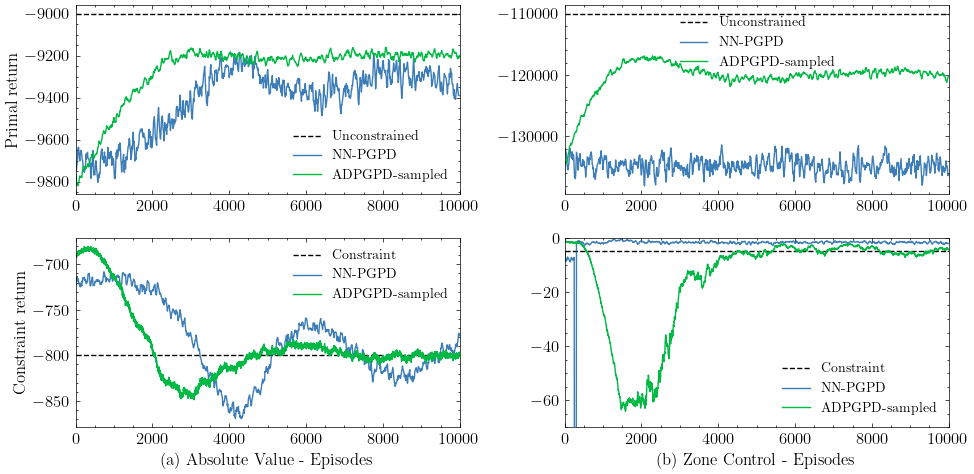

In [52]:
with plt.style.context(['science'], ['ieee']):
    matplotlib.rcParams.update({'font.size': 12})
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[10, 5])

    axes[0, 0].axhline(y=-9_000, color='k', linestyle='--', label='Unconstrained')
    axes[0, 0].plot(np.arange(0, 10_000, 10), vel_sampled_primal_nn, label='NN-PGPD', alpha=.8)
    axes[0, 0].plot(np.arange(0, 10_000, 10), vel_sampled_primal, label='ADPGPD-sampled')
    axes[0, 0].set_xlim(0, 10_000)
    axes[0, 0].legend(loc='lower right', fontsize=10)

    axes[0, 0].set_ylabel('Primal return')

    axes[1, 0].axhline(y=-800, color='k', linestyle='--', label='Constraint')
    axes[1, 0].plot(np.arange(0, 10_000, 10), vel_sampled_dual_nn, label='NN-PGPD', alpha=.8)
    axes[1, 0].plot(np.arange(10_000), vel_sampled_dual, label='ADPGPD-sampled')
    axes[1, 0].set_xlim(0, 10_000)
    axes[1, 0].legend(fontsize=10)

    axes[1, 0].set_xlabel('(a) Absolute Value - Episodes')
    axes[1, 0].set_ylabel('Constraint return')

    #################

    axes[0, 1].axhline(y=-110_000, color='k', linestyle='--', label='Unconstrained')
    axes[0, 1].plot(np.arange(0, 10_000, 10), obs_sampled_primal_nn, label='NN-PGPD', alpha=.8)
    axes[0, 1].plot(np.arange(0, 10_000, 10), obs_sampled_primal, label='ADPGPD-sampled')
    axes[0, 1].set_xlim(0, 10_000)
    axes[0, 1].legend(fontsize=10)

    axes[1, 1].axhline(y=-5, color='k', linestyle='--', label='Constraint')
    axes[1, 1].plot(np.arange(0, 10_000, 10), obs_sampled_dual_nn, label='NN-PGPD', alpha=.8)
    axes[1, 1].plot(np.arange(10_000), obs_sampled_dual, label='ADPGPD-sampled')
    axes[1, 1].set_xlim(0, 10_000)
    axes[1, 1].set_ylim(-70, 0)
    axes[1, 1].legend(fontsize=10)

    axes[1, 1].set_xlabel('(b) Zone Control - Episodes')

    plt.tight_layout()
    plt.show()